In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Mental Health Dataset.csv")
data.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [3]:
# Data size
print(f'{data.shape[0]} rows')
print(f'{data.shape[1]} columns')

10392 rows
3 columns


In [4]:
print("==" * 30)
print(" " * 19, "Dataset Information")
print("==" * 30)
print(data.info())

                    Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB
None


In [5]:
print(f"{data.duplicated().sum()}")


0


In [6]:
data.isnull().sum()


posts        1
predicted    0
intensity    0
dtype: int64

In [7]:
data = data.dropna()

data.isnull().sum()

posts        0
predicted    0
intensity    0
dtype: int64

<AxesSubplot:xlabel='predicted', ylabel='count'>

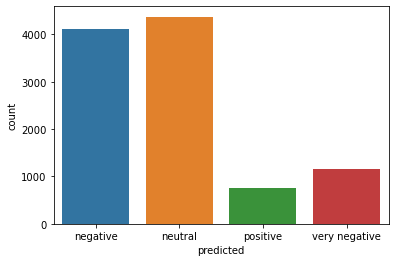

In [8]:
sns.countplot(data.predicted)

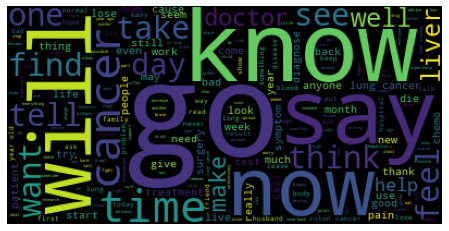

In [9]:
# WordCloud
all_text = " ".join(data['posts'])

wc = WordCloud(stopwords = STOPWORDS).generate(all_text)

plt.figure(figsize = (9,4))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
seq_len = [None] * len(data)

for i,post in enumerate(data['posts']):
    
    seq_len[i] = len(post.split())

Max seq: 5413


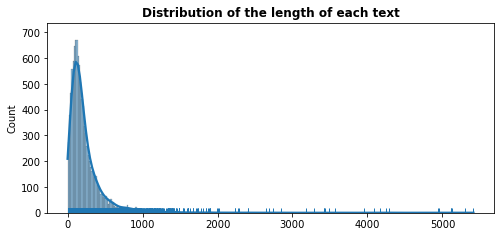

In [11]:
print("==" * 15)
print(f'Max seq: {max(seq_len)}')
print("==" * 15)
plt.figure(figsize = (8,3.5))
sns.histplot(seq_len, kde = True, line_kws = {'linewidth':2.3})
sns.rugplot(seq_len)
plt.title("Distribution of the length of each text", fontsize = 12, fontweight = "bold")
plt.show()


In [12]:
# Define language model
nlp = spacy.load("en_core_web_sm")


In [13]:
# Text preprocessing
def preprocess(txt:str):
    
    doc = nlp(txt)
    
    tokens_filtrered = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
            
        tokens_filtrered.append(token.lemma_)
    
    y=[]
    for i in tokens_filtrered:
        if i.isalnum():
            y.append(i)
    
    return " ".join(y)

In [14]:
# We apply preprocessing.
data['posts_prep'] = data['posts'].apply(preprocess)

In [15]:
data.shape

(10391, 4)

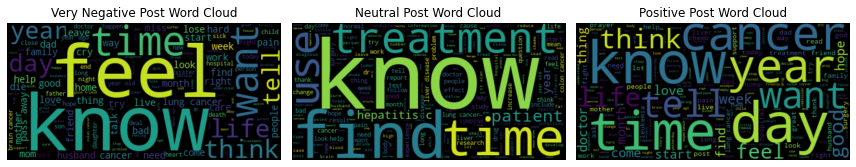

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_text = ' '.join(data[data.predicted == 'negative'].posts_prep.tolist())
neutral_text = ' '.join(data[data.predicted == 'neutral'].posts_prep.tolist())
positive_text = ' '.join(data[data.predicted == 'positive'].posts_prep.tolist())
very_negative_text = ' '.join(data[data.predicted == 'very negative'].posts_prep.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)
very_negative_wordcloud=WordCloud().generate(very_negative_text)
# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Post Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(131)
plt.imshow(very_negative_wordcloud, interpolation='bilinear')
plt.title('Very Negative Post Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Post Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Post Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

In [17]:
negative_post_corpus=[]

In [18]:
for msg in data[data['predicted']=='negative']['posts'].tolist():
    for word in msg.split():
        negative_post_corpus.append(word)

In [19]:
len(negative_post_corpus)

939241

In [20]:
negative_post_corpus

['I',
 'know',
 'as',
 'parent',
 'of',
 'child',
 'with',
 'down',
 'syndrome',
 'that',
 'you',
 'have',
 'all',
 'hear',
 'that',
 'our',
 'child',
 'are',
 'at',
 'a',
 'high',
 'risk',
 'of',
 'leukemia',
 'as',
 'parent',
 'we',
 'read',
 'up',
 'on',
 'it',
 'and',
 'then',
 'say',
 'well',
 'that',
 'will',
 'not',
 'happen',
 'to',
 'my',
 'child',
 'well',
 'when',
 'will',
 'have',
 'just',
 'turn',
 '2yr',
 'old',
 'he',
 'start',
 'bruise',
 'the',
 'thought',
 'of',
 'leukemia',
 'breafly',
 'cross',
 'my',
 'mind',
 'but',
 'I',
 'quickly',
 'push',
 'it',
 'out',
 'of',
 'my',
 'mind',
 'and',
 'rationalize',
 'it',
 'by',
 'say',
 'that',
 'he',
 'was',
 'a',
 'rough',
 'playing',
 '2yr',
 'old',
 'and',
 'it',
 'was',
 'normal',
 'to',
 'bruise',
 'now',
 'and',
 'then',
 'I',
 'have',
 'just',
 'go',
 'to',
 'work',
 'a',
 'few',
 'month',
 'before',
 'and',
 'will',
 'have',
 'get',
 'a',
 'little',
 'more',
 'fussy',
 'and',
 'whinny',
 'but',
 'that',
 'is',
 'nor

In [21]:
from collections import Counter

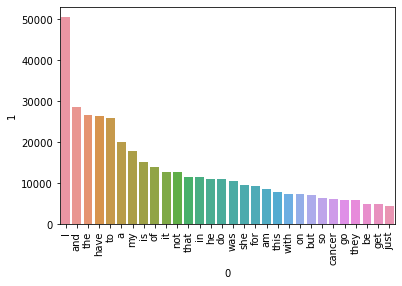

In [22]:
sns.barplot(pd.DataFrame(Counter(negative_post_corpus).most_common(30))[0],
           pd.DataFrame(Counter(negative_post_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [23]:
positive_post_corpus=[]

In [24]:
for msg in data[data['predicted']=='positive']['posts'].tolist():
    for word in msg.split():
        positive_post_corpus.append(word)

In [25]:
len(positive_post_corpus)

190910

In [26]:
positive_post_corpus

['hi',
 'everyone',
 'okay',
 'this',
 'is',
 'not',
 'one',
 'of',
 'my',
 'more',
 'usual',
 'upbeat',
 'and',
 'cheerful',
 'message',
 'sigh',
 'but',
 'an',
 'update',
 'on',
 'goose',
 'I',
 'just',
 'get',
 'off',
 'the',
 'phone',
 'with',
 'he',
 'I',
 'do',
 'not',
 'want',
 'to',
 'go',
 'into',
 'great',
 'detail',
 'with',
 'anyone',
 'without',
 'first',
 'ask',
 'his',
 'permission',
 'to',
 'do',
 'so',
 'I',
 'm',
 'sure',
 'you',
 'can',
 'all',
 'understand',
 'sigh',
 'he',
 'have',
 'been',
 'book',
 'into',
 'princess',
 'margret',
 'hospital',
 'in',
 'toronto',
 'today',
 'for',
 'aml',
 'explaination',
 'follow',
 'acute',
 'myeloid',
 'leukemia',
 'aml',
 'also',
 'know',
 'as',
 'acute',
 'myelogenous',
 'leukemia',
 'is',
 'a',
 'cancer',
 'of',
 'the',
 'myeloid',
 'line',
 'of',
 'white',
 'blood',
 'cell',
 'characterize',
 'by',
 'the',
 'rapid',
 'proliferation',
 'of',
 'abnormal',
 'cell',
 'which',
 'accumulate',
 'in',
 'the',
 'bone',
 'marrow',
 '

In [27]:
from collections import Counter

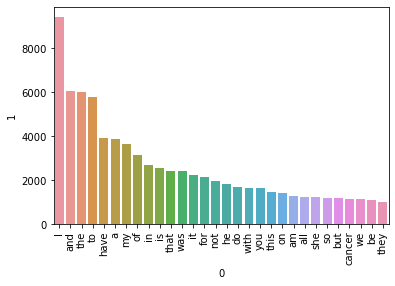

In [28]:
sns.barplot(pd.DataFrame(Counter(positive_post_corpus).most_common(30))[0],
           pd.DataFrame(Counter(positive_post_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [29]:
neutral_post_corpus=[]

In [30]:
for msg in data[data['predicted']=='neutral']['posts'].tolist():
    for word in msg.split():
        neutral_post_corpus.append(word)

In [31]:
len(neutral_post_corpus)

1040199

In [32]:
neutral_post_corpus

['but',
 'in',
 'my',
 'heart',
 'I',
 'know',
 'this',
 'is',
 'the',
 'future',
 'promise',
 'article',
 'regardless',
 'http',
 'ottawa',
 'ctvnew',
 'can',
 'ottawa',
 'researcher',
 'hopeful',
 'nano',
 'particle',
 'can',
 'cure',
 'leukemia',
 '1',
 '1409330',
 'ottawa',
 'researcher',
 'hopeful',
 'nano',
 'particle',
 'can',
 'cure',
 'leukemia',
 'medical',
 'breakthrough',
 'ctv',
 'joanne',
 'schnurr',
 'on',
 'homegrown',
 'research',
 'that',
 'is',
 'close',
 'to',
 'cure',
 'leukemia',
 'medical',
 'leader',
 'around',
 'the',
 'world',
 'have',
 'their',
 'eye',
 'on',
 'ottawa',
 'blood',
 'cancer',
 'breakthrough',
 'ottawa',
 'doctor',
 'talk',
 'cure',
 'doctor',
 'at',
 'the',
 'ottawa',
 'research',
 'institute',
 'call',
 'it',
 'a',
 'major',
 'finding',
 'in',
 'the',
 'battle',
 'against',
 'the',
 'blood',
 'cancer',
 'leukemia',
 'share',
 '8',
 'text',
 'share',
 'on',
 'print',
 'share',
 'on',
 'email',
 '0',
 'joanne',
 'schnurr',
 'ctv',
 'ottawa',
 'p

In [33]:
from collections import Counter

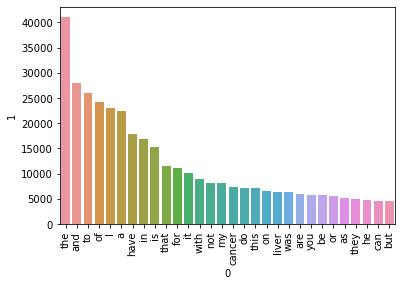

In [34]:
sns.barplot(pd.DataFrame(Counter(neutral_post_corpus).most_common(30))[0],
           pd.DataFrame(Counter(neutral_post_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [35]:
# We select the features that interest us.
data_new = data[['posts_prep','intensity']]
data_new.head()

,posts_prep,intensity
0,know parent child syndrome hear child high ris...,-1
1,heart know future promise article regardless h...,0
2,mylefibrosis turn leukemia want stem cell tran...,-1
3,health group subject wayne dyer leukemia case ...,0
4,gmos link leukemia http nsnbc 2013 07 17 gmo l...,0


<AxesSubplot:xlabel='intensity', ylabel='count'>

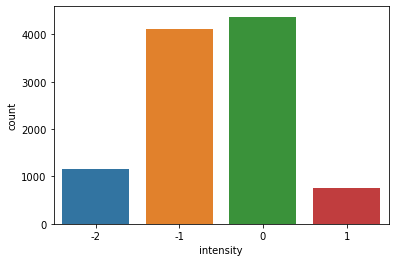

In [36]:
sns.countplot(data_new['intensity'])

In [37]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_lg')

In [38]:
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point

In [39]:
# Get the vector for 'text':
doc[-3], doc[-3].vector


(processing,
 array([-0.98158 , -2.6326  , -0.02352 ,  3.2856  ,  3.63    , -1.2795  ,
         3.6477  ,  4.1457  , -3.911   , -1.8988  ,  6.3144  ,  3.7014  ,
        -5.9561  ,  5.1211  , -1.8175  , -1.0002  ,  7.4333  ,  1.6981  ,
        -4.4509  , -1.9858  , -2.1477  ,  3.4198  , -5.8983  ,  1.8785  ,
        -3.4049  , -2.1389  , -0.63041 , -1.8979  ,  0.10881 , -0.63591 ,
         3.8009  ,  0.89979 , -4.6852  ,  0.17034 , -0.29025 , -5.6625  ,
         4.1363  ,  1.0943  ,  3.3971  ,  1.8353  ,  0.15847 , -0.96643 ,
         2.9794  , -0.68237 , -4.4391  ,  2.494   ,  4.9149  , -0.63641 ,
        -2.7878  , -2.0478  , -0.20991 ,  3.1249  , -1.678   , -5.3789  ,
        -2.6653  ,  0.82363 , -2.2348  ,  1.5312  ,  1.861   , -2.0801  ,
         4.343   ,  1.5988  , -2.3153  ,  0.62286 ,  3.0526  ,  1.7596  ,
        -3.0563  , -4.1593  , -1.0461  ,  0.62876 , -2.6396  ,  0.23815 ,
        -3.8904  ,  2.0345  , -1.1544  , -0.37425 , -5.1358  ,  3.371   ,
         0.90354 , -0.215

In [40]:
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([ 0.13538204, -0.50049055,  0.26314098, -1.8586416 , -0.57580197,
       -0.07358702, -0.035399  ,  4.4508467 , -3.7474205 ,  1.6460339 ,
        6.90367   ,  1.3508627 , -2.7805922 , -0.6575441 ,  2.2817955 ,
        0.993958  ,  2.383111  , -0.21607213, -1.462939  ,  0.92183   ,
        1.0806081 ,  1.930987  , -3.292195  , -1.8399448 , -2.533392  ,
       -1.9827248 , -1.564382  , -1.138241  , -2.0831861 , -0.430525  ,
       -0.403931  , -0.11929995, -3.6540642 ,  0.19895704, -1.9910061 ,
        0.3238971 , -0.34544173,  0.969619  ,  5.6958246 ,  2.223509  ,
       -1.6114123 ,  2.346086  , -0.700554  , -1.539235  , -1.0771002 ,
        2.6830828 ,  3.4063332 , -2.901462  , -2.5829167 ,  1.1031249 ,
        1.362951  , -0.530291  ,  2.270077  , -4.8443303 , -1.537749  ,
        0.49870294,  2.492154  ,  1.8763611 ,  0.89088696,  0.88795805,
        4.37719   ,  0.06023499, -1.3463123 ,  0.22848296, -1.0967581 ,
        1.9763839 , -2.2734218 , -4.24074   ,  2.6045609 ,  3.91

In [41]:
embeddings=[]
for x in data_new.posts_prep:
    embeddings.append(nlp(x).vector)


In [42]:
embeddings[0]

array([ 7.1212894e-01,  8.9502650e-01, -2.0323217e+00, -4.4568694e-01,
        7.8367645e-01,  7.7048975e-01,  1.3580613e+00,  2.8276632e+00,
       -1.4052082e+00,  1.4257362e+00,  2.8882678e+00,  1.0604031e+00,
       -2.8948624e+00,  2.1500585e+00,  1.3942947e+00, -6.7325795e-01,
        1.9245528e+00, -1.9238329e+00, -3.1228113e-01, -2.8077966e-01,
       -6.0908967e-01,  4.5954517e-01, -2.4396846e-01, -1.6521773e+00,
       -8.0247992e-01, -8.3460140e-01, -2.0858014e+00,  4.4227153e-04,
        5.4786521e-01,  1.9515389e+00,  1.7991827e+00, -7.9098529e-01,
       -3.2033899e-01, -1.5393136e+00,  2.8165591e-01, -1.4830180e+00,
       -3.1719428e-02,  9.6913397e-01,  2.6759787e+00,  1.4427072e+00,
       -4.8174632e-01, -6.2669143e-02,  1.1297702e+00, -2.1074615e-01,
       -1.2949140e+00,  1.4218978e+00,  9.3436426e-01, -2.3556695e+00,
       -5.3649288e-01,  5.5846262e-01,  7.5605524e-01,  1.3374137e+00,
        6.3426442e-02, -2.0696735e+00, -1.2605236e+00,  6.1498773e-01,
      

In [43]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [44]:
data.posts_prep

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        health group subject wayne dyer leukemia case ...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey 25 year old male work eat pretty healthy p...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise remove abnormal polyp christ siz...
10390    66 year old father past year need try find rel...
10391    bein bloody stool year start june 2 week away ...
Name: posts_prep, Length: 10391, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

posts = data['posts_prep']
data['intensity']=le.fit_transform(data['intensity'])

labels = data['intensity']
sentences = np.array(posts)
labels = np.array(labels)
posts.shape,labels.shape

((10391,), (10391,))

In [48]:
10391*.80

8312.800000000001

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [50]:
training_sentences = posts[0:8312]
testing_sentences = posts[8312:]
training_labels = labels[0:8312]
testing_labels = labels[8312:]

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=200, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=200, padding='post', truncating='post')

In [57]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [64]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000,16,input_length=200))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))
opt = tf.keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 4)                 104       
                                                        

In [65]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [66]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),callbacks=[early_stopping])

Epoch 1/100
260/260 [==============================] - 2s 6ms/step - loss: 1.1128 - accuracy: 0.5101 - val_loss: 1.1358 - val_accuracy: 0.5349
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.7969 - accuracy: 0.6807 - val_loss: 1.0628 - val_accuracy: 0.5738
Epoch 3/100
260/260 [==============================] - 1s 5ms/step - loss: 0.6502 - accuracy: 0.7502 - val_loss: 1.0478 - val_accuracy: 0.6099
Epoch 4/100
260/260 [==============================] - 1s 6ms/step - loss: 0.5582 - accuracy: 0.7927 - val_loss: 1.1028 - val_accuracy: 0.5998
Epoch 5/100
260/260 [==============================] - 1s 6ms/step - loss: 0.4766 - accuracy: 0.8231 - val_loss: 1.1301 - val_accuracy: 0.6147
Epoch 6/100
260/260 [==============================] - 1s 5ms/step - loss: 0.4022 - accuracy: 0.8539 - val_loss: 1.1069 - val_accuracy: 0.6253


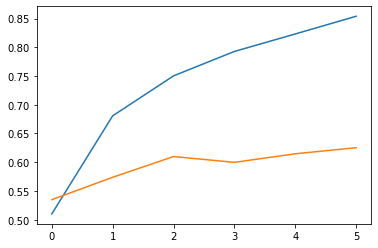

In [67]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.show()

In [68]:
loss, acc = model.evaluate(testing_padded, testing_labels)


65/65 [==============================] - 0s 2ms/step - loss: 1.0478 - accuracy: 0.6099


In [69]:
y_pred = model.predict(testing_padded)


65/65 [==============================] - 0s 1ms/step


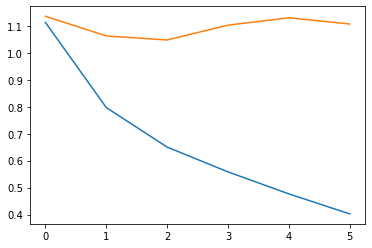

In [70]:
plt.plot(history.history["loss"], label="Train Accuracy")
plt.plot(history.history["val_loss"], label="Val Accuracy")
plt.show()